## Inheritance

#### Child class will inherit the attributes and methods from Parent class

In [3]:
class Person:

    def __init__(self, name, age):
        self.name = name
        self.age = age 

    def introduce(self):
        print(f"Hi there my name is {self.name}")
        print(f"I am currently {self.age} years old")

In [34]:
class Employee(Person):

    def __init__(self, name, age, company):
        super().__init__(name, age)
        self.company = company

    def work(self):
        super().introduce()
        print(f"I work for {self.company}")

In [6]:
p1=Person(name="Sarthak",age=32)

In [7]:
p1.name

'Sarthak'

In [8]:
p1.age

32

In [9]:
p1.introduce()

Hi there my name is Sarthak
I am currently 32 years old


In [10]:
type(p1)

__main__.Person

In [11]:
e1=Employee(name="Raman",age=25,company="Infosys")
type(e1)

__main__.Employee

In [12]:
e1.name

'Raman'

In [13]:
e1.name

'Raman'

In [14]:
e1.age

25

In [15]:
e1.company

'Infosys'

In [16]:
e1.work()

I work for Infosys


In [17]:
e1.introduce()

Hi there my name is Raman
I am currently 25 years old


In [18]:
e1.introduce()
e1.work()

Hi there my name is Raman
I am currently 25 years old
I work for Infosys


In [36]:
e2=Employee(name="Gaurav", age=22,company="WIPRO")

In [37]:
e2.work()

Hi there my name is Gaurav
I am currently 22 years old
I work for WIPRO


## Pydantic for data validation

In [19]:
%pip install pydantic email-validator

   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.9 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.9 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/1.9 MB 599.9 kB/s eta 0:00:03
   ---------- ----------------------------- 0.5/1.9 MB 599.9 kB/s eta 0:00:03
   ---------------- ----------------------- 0.8/1.9 MB 645.7 kB/s eta 0:00:02
   ---------------- ----------------------- 0.8/1.9 MB 645.7 kB/s eta 0:00:02
   --------------------- ------------------ 1.0/1.9 MB 645.1 kB/s eta 0:00:02
   --------------------------- ------------ 1.3/1.9 MB 684.9 kB/s eta 0:00:01
   --------------------------- ------------ 1.3/1.9 MB 684.9 kB/s eta 0:00:01
   -------------------------------- ------- 1.6/1.9 MB 693.5 kB/s eta 0:00:01
   ----------------------------

In [20]:
from pydantic import BaseModel,Field,EmailStr

In [21]:
from typing import List

In [22]:
from datetime import date

In [38]:
class Student(BaseModel):

    roll_no: int = Field(description="Roll Number of student", gt=0) ## gt= greater than
    name: str = Field(description="Name of the student", min_length=3)
    email: EmailStr = Field(description="Email for student")
    hobbies: List[str] = Field(description="Student Hobbies", default_factory=list)
    doj: date = Field("Date of Joining", le=date.today()) ## le= less than

    def get_student_info(self):
        print(f"Roll Number : {self.roll_no}")
        print(f"Name : {self.name}")
        print(f"Email : {self.email}")
        print(f"Hobbies : {self.hobbies}")
        print(f"Date of Joining : {self.doj}")

In [24]:
s1=Student(
    roll_no=101,
    name="Rahul",
    email="example@text.com",
    hobbies=["Singing","Cricket"],
    doj=date(2024,2,10)
)

In [25]:
s1

Student(roll_no=101, name='Rahul', email='example@text.com', hobbies=['Singing', 'Cricket'], doj=datetime.date(2024, 2, 10))

In [26]:
s1.roll_no

101

In [27]:
s1.name

'Rahul'

In [28]:
s1.email

'example@text.com'

In [29]:
s1.hobbies

['Singing', 'Cricket']

In [30]:
s1.doj

datetime.date(2024, 2, 10)

In [31]:
s1.get_student_info()

Roll Number : 101
Name : Rahul
Email : example@text.com
Hobbies : ['Singing', 'Cricket']
Date of Joining : 2024-02-10


## Multilevel Inheritance

In [5]:
class Employee2:

    def __init__(self, emp_id, name) -> None:
        self.emp_id = emp_id
        self.name = name 

    def get_employee_info(self):
        print(f"Employee id : {self.emp_id}")
        print(f"Name : {self.name}")  

In [17]:
class Manager(Employee2):

    def __init__(self, emp_id, name,dept) -> None:
        super().__init__(emp_id, name)
        self.dept = dept

    def get_manager_info(self):
        super().get_employee_info()
        print(f"Department : {self.dept}")    

In [7]:
class ProjectManager(Manager):

    def __init__(self, emp_id, name, dept,project) -> None:
        super().__init__(emp_id, name, dept)
        self.project = project

    def get_project_info(self):
        print(f"Project Name : {self.project}")    

In [8]:
e2=Employee2(emp_id=103, name= "Gaurav")

In [9]:
e2.emp_id

103

In [10]:
e2.name

'Gaurav'

In [11]:
e2.get_employee_info()

Employee id : 103
Name : Gaurav


In [12]:
m2= Manager(emp_id=102,name="Mayur",dept="Engg.")
type(m2)

__main__.Manager

In [13]:
m2.emp_id

102

In [14]:
m2.name

'Mayur'

In [15]:
m2.dept

'Engg.'

In [18]:
m2.get_employee_info()

Employee id : 102
Name : Mayur


In [20]:
m2.get_manager_info() 

Department : Engg.


In [21]:
m2.get_employee_info()
m2.get_manager_info()

Employee id : 102
Name : Mayur
Department : Engg.


In [22]:
pm2 = ProjectManager(emp_id=101, name="Raman", dept="Engg.", project="Tesla")
type(pm2)

__main__.ProjectManager

In [23]:
pm2.emp_id

101

In [24]:
pm2.name

'Raman'

In [25]:
pm2.dept

'Engg.'

In [26]:
pm2.project

'Tesla'

In [28]:
pm2.get_employee_info()
pm2.get_manager_info()
pm2.get_project_info()

Employee id : 101
Name : Raman
Department : Engg.
Project Name : Tesla


## Hierarchical Inhertance

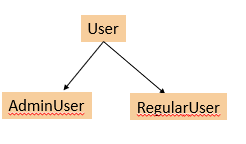

In [29]:
class User:

    def __init__(self, id, username, email) -> None:
        self.id = id 
        self.username = username
        self.email = email 

    def get_user_info(self):
        print(f"User Id : {self.id}")
        print(f"username : {self.username}")
        print(f"Email : {self.email}")

In [30]:
class AdminUser(User):

    def __init__(self, id, username, email, access) -> None:
        super().__init__(id, username, email)
        self.access = access

    def get_access_level(self):
        print(f"Access : {self.access}")

In [31]:
class RegularUser(User):

    def __init__(self, id, username, email, sub) -> None:
        super().__init__(id, username, email)
        self.sub = sub

    def get_sub_type(self):
        print(f"Subscription Type : {self.sub}")

In [35]:
u1 = User(id=1, username="Raghav", email="Raghav@gmail.com")
type(u1)

__main__.User

In [33]:
u1.id

1

In [36]:
u1.username

'Raghav'

In [37]:
u1.email

'Raghav@gmail.com'

In [38]:
u1.get_user_info()

User Id : 1
username : Raghav
Email : Raghav@gmail.com


In [39]:
a1 = AdminUser(id=2, username="Ram", email="Ram@test.com", access="partial")
type(a1)

__main__.AdminUser

In [40]:
a1.id

2

In [41]:
a1.username

'Ram'

In [42]:
a1.email

'Ram@test.com'

In [43]:
a1.access

'partial'

In [44]:
a1.get_user_info()
a1.get_access_level()

User Id : 2
username : Ram
Email : Ram@test.com
Access : partial


In [45]:
r1 = RegularUser(id=3, username="John", email="john@test.com", sub="paid-yearly")
type(r1)

__main__.RegularUser

In [46]:
r1.id

3

In [47]:
r1.username

'John'

In [48]:
r1.email

'john@test.com'

In [49]:
r1.sub

'paid-yearly'

In [50]:
r1.get_user_info()
r1.get_sub_type()

User Id : 3
username : John
Email : john@test.com
Subscription Type : paid-yearly
